## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Understanding



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Data/data-clean.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

#doing this here and not during data cleaning because this split doesnt survive being saved as .csv
df['genres'] = df['genres'].map(lambda x: x.split(","))
df['director'] = df['director'].map(lambda x: x.split(","))

display(df.head(2)), display(df.info()) ,display(df.isna().sum())

,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,genres,director
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides 2011,410600000,241063875,1045663875,804600000,635063875,"[Action, Adventure, Fantasy]",[Rob Marshall]
1,2019-06-07,Dark Phoenix 2019,350000000,42762350,149762350,107000000,-200237650,"[Action, Adventure, Sci-Fi]",[Simon Kinberg]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       1483 non-null   object
 1   movie              1483 non-null   object
 2   production_budget  1483 non-null   int64 
 3   domestic_gross     1483 non-null   int64 
 4   worldwide_gross    1483 non-null   int64 
 5   foreign_gross      1483 non-null   int64 
 6   profit             1483 non-null   int64 
 7   genres             1483 non-null   object
 8   director           1483 non-null   object
dtypes: int64(5), object(4)
memory usage: 104.4+ KB


None

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
foreign_gross        0
profit               0
genres               0
director             0
dtype: int64

(None, None, None)

# Question: Is there any relationship between directors' performance and movies' success?

After discovering the relationship between movie genres and movies' success, we were curious if there was any particular director who appeared frequently in successful movies.

To answer this, we will first look at the top 10 movies by profit. 

In [2]:
print(f'This cleaned data we are using includes movies from {df.release_date.min()} to {df.release_date.max()}.')

This cleaned data we are using includes movies from 2010-01-08 to 2020-02-21.


The first step will be preparing a new dataframe that has only the necessary columns. Then, we will find and visualize the top movies sorted by profit.

In [3]:
# Keeping only the necessary columns
q3_df = df.loc[:, ['movie', 'production_budget', 'profit', 'director']]
q3_df

,movie,production_budget,profit,director
0,Pirates of the Caribbean: On Stranger Tides 2011,410600000,635063875,[Rob Marshall]
1,Dark Phoenix 2019,350000000,-200237650,[Simon Kinberg]
2,Avengers: Age of Ultron 2015,330600000,1072413963,[Joss Whedon]
3,Avengers: Infinity War 2018,300000000,1748134200,"[Anthony Russo, Joe Russo]"
4,Justice League 2017,300000000,355945209,[Zack Snyder]
...,...,...,...,...
1478,Emily 2017,27000,-23453,[Ryan Graves]
1479,Exeter 2015,25000,464792,[Marcus Nispel]
1480,Dutch Kills 2015,25000,-25000,[Joseph Mazzella]
1481,The Ridges 2011,17300,-17300,[Brandon Landers]


In [4]:
# Finding the top 10 movies by 'profit'
top10_profit = q3_df.sort_values(by='profit', ascending=False).head(10)
top10_profit = top10_profit.set_index('movie')
top10_profit

,production_budget,profit,director
movie,,,
Avengers: Infinity War 2018,300000000,1748134200,"[Anthony Russo, Joe Russo]"
Jurassic World 2015,215000000,1433854864,[Colin Trevorrow]
Furious 7 2015,190000000,1328722794,[James Wan]
The Avengers 2012,225000000,1292935897,[Joss Whedon]
Black Panther 2018,200000000,1148258224,[Ryan Coogler]
Jurassic World: Fallen Kingdom 2018,170000000,1135772799,[J.A. Bayona]
Frozen 2013,150000000,1122469910,"[Chris Buck, Jennifer Lee]"
Beauty and the Beast 2017,160000000,1099199706,[Bill Condon]
Minions 2015,74000000,1086336173,"[Pierre Coffin, Kyle Balda]"


In [5]:
# Visualizing the top 10 movies by 'profit' 
# Bar chart
#ax1 = top10_profit.plot(kind='barh')
        
#ax1.set_xlabel("Profit")
#ax1.set_title("Top 10 Movies by Profit 2010-2020")
#ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

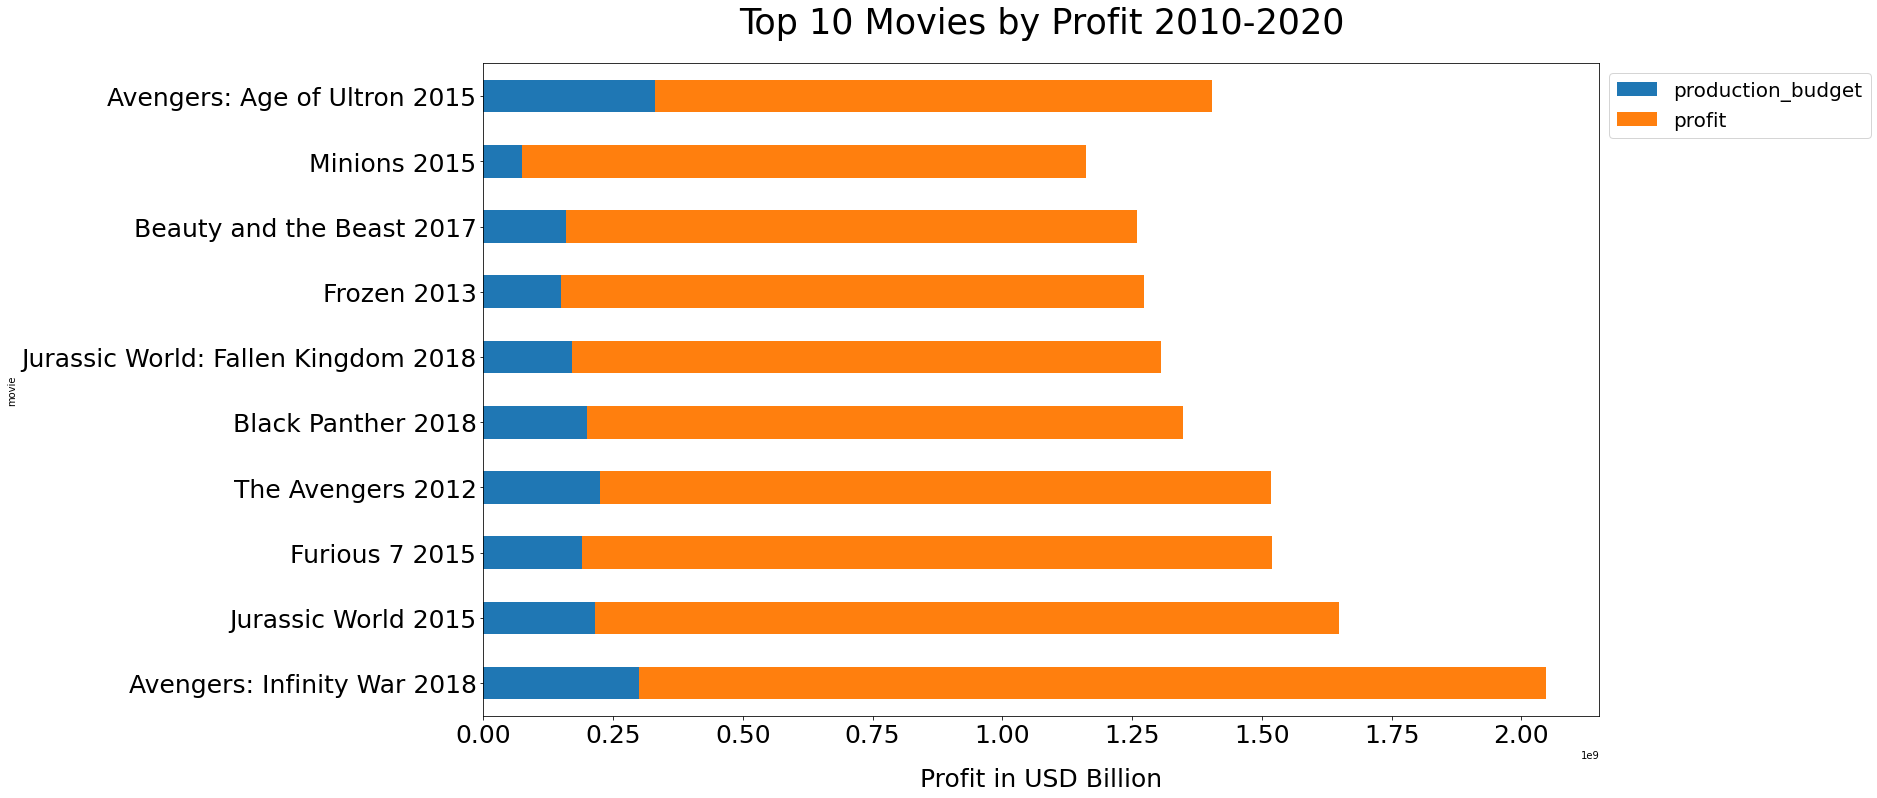

In [6]:
# Stacked bar chart
ax = top10_profit.plot(kind='barh', stacked=True, figsize=(20,12), fontsize=25)

ax.set_xlabel("Profit in USD Billion", fontsize=25, labelpad=20)
ax.set_title("Top 10 Movies by Profit 2010-2020", fontsize=35, pad=30)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=20);

In [7]:
top10_profit['director'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Joss Whedon]                   2
[J.A. Bayona]                   1
[Colin Trevorrow]               1
[Anthony Russo,  Joe Russo]     1
[Chris Buck,  Jennifer Lee]     1
[Pierre Coffin,  Kyle Balda]    1
[Ryan Coogler]                  1
[James Wan]                     1
[Bill Condon]                   1
Name: director, dtype: int64

In [8]:
print(f"The directors who appear the most in the 'Top 10 Movies by Profit' are {top10_profit['director'].value_counts().head(2)}.")

The directors who appear the most in the 'Top 10 Movies by Profit' are [Joss Whedon]    2
[J.A. Bayona]    1
Name: director, dtype: int64.


We found out the top 10 movies by profit and their directors.  The dirctor, Joss Whedon, appeared the most (2 times) in the top 10 movies by profit. 

However, based on this result, it is difficult to say that there is any correlation between directors' performance and the movie success. We want to go back and check the previous dataframe with all the movies and see if there is any correlation between them at all. 

We will count the number of movies that each director made and calculate their average return.  

Before investigating, we notice that the director column has nested lists. We would like to expand these so we have individaul director per row.

In [9]:
### Finding correlation between directors' performance and profit

In [10]:
# Creating a new dataframe 'individual_df' with 'director' column expanded to show individaul director per row
individual_df = q3_df.explode('director')
individual_df

,movie,production_budget,profit,director
0,Pirates of the Caribbean: On Stranger Tides 2011,410600000,635063875,Rob Marshall
1,Dark Phoenix 2019,350000000,-200237650,Simon Kinberg
2,Avengers: Age of Ultron 2015,330600000,1072413963,Joss Whedon
3,Avengers: Infinity War 2018,300000000,1748134200,Anthony Russo
3,Avengers: Infinity War 2018,300000000,1748134200,Joe Russo
...,...,...,...,...
1478,Emily 2017,27000,-23453,Ryan Graves
1479,Exeter 2015,25000,464792,Marcus Nispel
1480,Dutch Kills 2015,25000,-25000,Joseph Mazzella
1481,The Ridges 2011,17300,-17300,Brandon Landers


In [11]:
# Counting movies made by each director
individual_df['director'].value_counts()

Tim Story               8
Clint Eastwood          7
Steven Spielberg        7
Ridley Scott            6
Jon M. Chu              6
                       ..
 Ron Clements           1
Alejandro Monteverde    1
Andrew Adamson          1
Gus Van Sant            1
Noam Murro              1
Name: director, Length: 1122, dtype: int64

In [12]:
# Creating a column that shows the number of movies made by the individual director
individual_df['#movies_by_director'] = individual_df.groupby(['director'])['movie'].transform('count')

# Organizing the dataframe by 'director' and 'movie'
individual_df.groupby(by=['director','movie']).sum()

production_budget  \
director        movie                                                                   
 Aaron Seltzer  Vampires Suck 2010                                           20000000   
 Aaron T. Wells Girls Gone Dead 2012                                           500000   
 Abby Kohn      I Feel Pretty 2018                                           32000000   
 Adam Busch     Drones 2010                                                    500000   
 Adam Montierth Locker 13 2014                                                 300000   
...                                                                               ...   
Zack Snyder     Justice League 2017                                         300000000   
                Legend of the Guardians: The Owls of Ga'Hoole 2010          100000000   
                Man of Steel 2013                                           225000000   
                Sucker Punch 2011                                            75000000   
Zal Batmanglij  The East 2013                                                 6500000   

                                                                       profit  \
director        movie                                                           
 Aaron Seltzer  Vampires Suck 2010                                   61424988   
 Aaron T. Wells Girls Gone Dead 2012                                  -500000   
 Abby Kohn      I Feel Pretty 2018                                   59553797   
 Adam Busch     Drones 2010                                           -500000   
 Adam Montierth Locker 13 2014                                        -296504   
...                                                                       ...   
Zack Snyder     Justice League 2017                                 355945209   
                Legend of the Guardians: The Owls of Ga'Hoole 2010   39716717   
                Man of Steel 2013                                   442999518   
                Sucker Punch 2011                                    14758389   
Zal Batmanglij  The East 2013                                        -3472044   

                                                                    #movies_by_director  
director        movie                                                                    
 Aaron Seltzer  Vampires Suck 2010                                                    1  
 Aaron T. Wells Girls Gone Dead 2012                                                  1  
 Abby Kohn      I Feel Pretty 2018                                                    1  
 Adam Busch     Drones 2010                                                           1  
 Adam Montierth Locker 13 2014                                                        1  
...                                                                                 ...  
Zack Snyder     Justice League 2017                                                   5  
                Legend of the Guardians: The Owls of Ga'Hoole 2010                    5  
                Man of Steel 2013                                                     5  
                Sucker Punch 2011                                                     5  
Zal Batmanglij  The East 2013                                                         1  

[1634 rows x 3 columns]

In [13]:
# Creating a column that shows the average profit made by the individual director
individual_df['avg_profit'] = individual_df.groupby(['director'])['profit'].transform('mean')
individual_df.groupby(by=['director', 'movie']).sum()

production_budget  \
director        movie                                                                   
 Aaron Seltzer  Vampires Suck 2010                                           20000000   
 Aaron T. Wells Girls Gone Dead 2012                                           500000   
 Abby Kohn      I Feel Pretty 2018                                           32000000   
 Adam Busch     Drones 2010                                                    500000   
 Adam Montierth Locker 13 2014                                                 300000   
...                                                                               ...   
Zack Snyder     Justice League 2017                                         300000000   
                Legend of the Guardians: The Owls of Ga'Hoole 2010          100000000   
                Man of Steel 2013                                           225000000   
                Sucker Punch 2011                                            75000000   
Zal Batmanglij  The East 2013                                                 6500000   

                                                                       profit  \
director        movie                                                           
 Aaron Seltzer  Vampires Suck 2010                                   61424988   
 Aaron T. Wells Girls Gone Dead 2012                                  -500000   
 Abby Kohn      I Feel Pretty 2018                                   59553797   
 Adam Busch     Drones 2010                                           -500000   
 Adam Montierth Locker 13 2014                                        -296504   
...                                                                       ...   
Zack Snyder     Justice League 2017                                 355945209   
                Legend of the Guardians: The Owls of Ga'Hoole 2010   39716717   
                Man of Steel 2013                                   442999518   
                Sucker Punch 2011                                    14758389   
Zal Batmanglij  The East 2013                                        -3472044   

                                                                    #movies_by_director  \
director        movie                                                                     
 Aaron Seltzer  Vampires Suck 2010                                                    1   
 Aaron T. Wells Girls Gone Dead 2012                                                  1   
 Abby Kohn      I Feel Pretty 2018                                                    1   
 Adam Busch     Drones 2010                                                           1   
 Adam Montierth Locker 13 2014                                                        1   
...                                                                                 ...   
Zack Snyder     Justice League 2017                                                   5   
                Legend of the Guardians: The Owls of Ga'Hoole 2010                    5   
                Man of Steel 2013                                                     5   
                Sucker Punch 2011                                                     5   
Zal Batmanglij  The East 2013                                                         1   

                                                                     avg_profit  
director        movie                                                            
 Aaron Seltzer  Vampires Suck 2010                                   61424988.0  
 Aaron T. Wells Girls Gone Dead 2012                                  -500000.0  
 Abby Kohn      I Feel Pretty 2018                                   59553797.0  
 Adam Busch     Drones 2010                                           -500000.0  
 Adam Montierth Locker 13 2014                                        -296504.0  
...                                                                         ...  
Zack Snyder     

In [14]:
# Checking correlation between the number of movies each director made and their average profit(performance)
individual_df.corr()['#movies_by_director'].sort_values()

profit                 0.183414
avg_profit             0.212817
production_budget      0.254591
#movies_by_director    1.000000
Name: #movies_by_director, dtype: float64

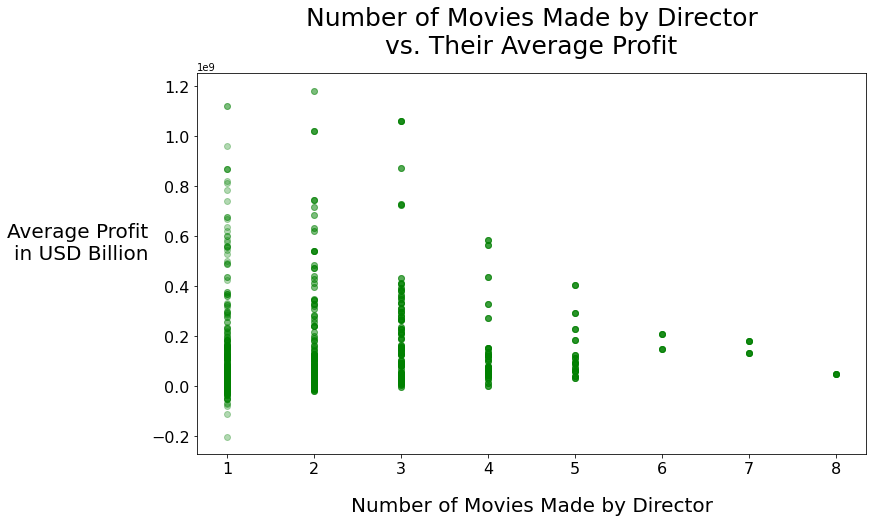

In [15]:
# Scatter plot of the relationship between the number of movies each director made and their average profit(performance)
fig, ax = plt.subplots(figsize=(12,7))

ax.scatter(individual_df['#movies_by_director'], individual_df['avg_profit'], alpha=0.3, color="green")
ax.set_title("Number of Movies Made by Director\nvs. Their Average Profit", fontsize=25, pad=20)
ax.set_xlabel("Number of Movies Made by Director", fontsize=20, labelpad=20)
ax.set_ylabel("Average Profit \nin USD Billion", fontsize=20, labelpad=70, rotation=0);
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

Conclusion: With correlation being 0.21, we see that there is no strong relationship between the number of movies each director made and their average return. However, we have a few interesting observations. 

First, the directors who made more than 5 movies during 2010 - 2020 did not make the most profitable movies. However, they also did not lose money and made steady and modest profits. 

Second, the most profitable movies were made by directors who produced 1 to 3 movies in that time. These movies did subtantially better than others, and therefore we could look deeper into them to find more insights. 

Perhaps, we could provide a suggested list of potential dirctors for Microsoft's new movie studio. 

In [16]:
# Fiding the succesful directors
individual_df[(individual_df['#movies_by_director'] == 2) & (individual_df['avg_profit'] > 900000000)]

,movie,production_budget,profit,director,#movies_by_director,avg_profit
2,Avengers: Age of Ultron 2015,330600000,1072413963,Joss Whedon,2,1.182675e+09
18,The Avengers 2012,225000000,1292935897,Joss Whedon,2,1.182675e+09
282,Despicable Me 3 2017,75000000,959727750,Pierre Coffin,2,1.023032e+09
282,Despicable Me 3 2017,75000000,959727750,Kyle Balda,2,1.023032e+09
290,Minions 2015,74000000,1086336173,Pierre Coffin,2,1.023032e+09
290,Minions 2015,74000000,1086336173,Kyle Balda,2,1.023032e+09
